In [1]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


c:\Users\raxo1\anaconda3\envs\TIL_programming\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- Import of prestation data ---

#Read the data
df_pres = pd.read_csv('data/transport_performance.csv', sep=';')

#Initialise prestation data
df_pres['Periods'] = pd.to_numeric(df_pres['Periods'], errors='coerce')
df_pres['Transport performance (billion passenger kilometres )'] = pd.to_numeric(df_pres['Transport performance (billion passenger kilometres )'], errors='coerce')

#Rename columns
df_pres.rename({'Transport performance (billion passenger kilometres )': 'Total travel'}, axis=1, inplace=True)

#Drop unnesecary columns
df_pres.drop('Margins', axis=1, inplace=True)
df_pres.drop('Population', axis=1, inplace=True)

df_pres.head()


,Modes of travel,Region characteristics,Periods,Total travel
0,Total,The Netherlands,2018,218.1
1,Total,The Netherlands,2019,218.8
2,Total,The Netherlands,2020,152.0
3,Total,The Netherlands,2021,168.4
4,Total,The Netherlands,2022,186.9


In [3]:
# --- Import of mobility data ---

df_mob = pd.read_csv('data/mobility_trends.csv', sep=';')

#initialise data

df_mob.head()


,Sex,Age,Modes of travel,Travel motives,Margins,Periods,Stages per person per day (average) (number),Distance travelled per stage (average) (passenger kilometres),Average travel time per stage (Minutes)
0,Total male and female,Total,Total,Total,Value,1999*,3.41,10.96,23.72
1,Total male and female,Total,Total,Total,Value,2000*,3.35,11.00,23.73
2,Total male and female,Total,Total,Total,Value,2001*,3.30,10.99,23.67
3,Total male and female,Total,Total,Total,Value,2002*,3.30,11.01,23.49
4,Total male and female,Total,Total,Total,Value,2003*,3.30,11.04,23.65


In [4]:
# --- Model 1 forecasting ---

#Create dataframe for model 1
df_m1 = df_mob[(df_mob['Modes of travel']=='Total') & (df_mob['Travel motives']== 'Total')].copy()

df_m1['ds'] = df_m1['Periods'].str[:-1] + '-01-01'
df_m1['ds'] = pd.to_datetime(df_m1['ds'])


# df_m1['Stages per person per day (average) (number)'] = df_m1['Stages per person per day (average) (number)'].astype(float)
# df_m1['Distance travelled per stage (average) (passenger kilometres)'] = df_m1['Distance travelled per stage (average) (passenger kilometres)'].astype(float)
df_m1['y'] = df_m1['Stages per person per day (average) (number)'].astype(float) * df_m1['Distance travelled per stage (average) (passenger kilometres)'].astype(float)

#Add regressor to dataframe to include covid as special event
df_m1['covid'] = 0
df_m1.loc[(df_m1['Periods'] == 2020), 'covid'] = 1
df_m1.loc[(df_m1['Periods'] == 2021), 'covid'] = 0.5

#Forecast the first model using prophet
m1 = Prophet()
m1.add_regressor('covid')
m1.fit(df_m1)
prediction_m1 = m1.make_future_dataframe(periods=5, freq='Y')
prediction_m1['covid'] = 0

forecast_m1 = m1.predict(prediction_m1)

C:\Users\raxo1\AppData\Local\Temp\ipykernel_23384\1104687673.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_m1.loc[(df_m1['Periods'] == 2021), 'covid'] = 0.5
10:39:06 - cmdstanpy - INFO - Chain [1] start processing
10:39:06 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\raxo1\anaconda3\envs\TIL_programming\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


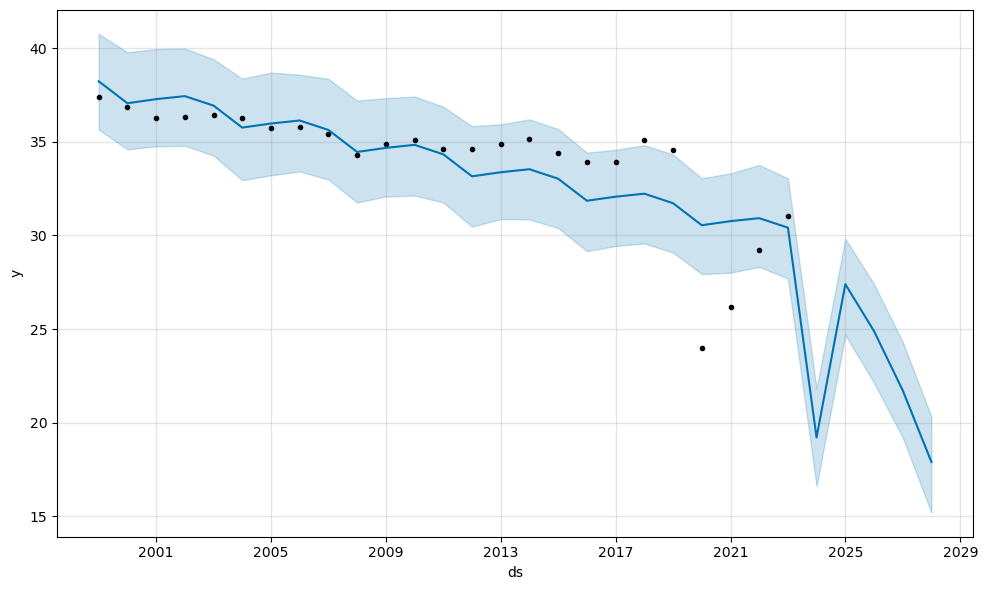

In [5]:
# --- Plot results of forecast model 1 ---
fig1 = m1.plot(forecast_m1)
plt.show()


In [6]:
# --- Evaluate model 1 ---

#Do cross_validation to check accuracy of model
df_cv_m1 = cross_validation(
    model=m1,
    initial='365 D',
    period='730 D',
    horizon='365 D'
)

df_p_m1 = performance_metrics(df_cv_m1)

#Print results of performance metrics
print("\nPerformance Metrics head:")
print(df_p_m1.head())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/12 [00:00<?, ?it/s]10:39:07 - cmdstanpy - INFO - Chain [1] start processing
10:39:08 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 1/12 [00:00<00:08,  1.25it/s]10:39:08 - cmdstanpy - INFO - Chain [1] start processing
10:39:19 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 2/12 [00:12<01:11,  7.12s/it]10:39:20 - cmdstanpy - INFO - Chain [1] start processing
10:39:32 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 3/12 [00:25<01:27,  9.76s/it]10:39:33 - cmdstanpy - INFO - Chain [1] start processing
10:39:46 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 4/12 [00:39<01:32, 11.53s/it]10:39:47 - cmdstanpy - INFO - Chain [1] start processing
10:40:03 - cmdstanpy - INFO - Chain [1] done processing
 42%|████▏     | 5/12 [00:55<01:32, 13.16s/it]10:40:03 - cmdstanpy - INFO - Chain [1] start processing
10:40:


Performance Metrics head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 360 days  7.508324  2.740132  2.142639  0.059052  0.059052  0.056412   
1 361 days  0.059272  0.243458  0.237450  0.006665  0.006665  0.006642   
2 362 days  1.548323  1.244316  0.896282  0.025699  0.025699  0.026352   
3 363 days  0.320439  0.566073  0.565205  0.016311  0.016311  0.016296   
4 364 days  0.069686  0.263981  0.243261  0.007132  0.007132  0.007110   

   coverage  
0       0.0  
1       0.0  
2       0.5  
3       0.0  
4       0.5  


In [7]:
# --- Model 2 forecasting ---

#Restructing of data
df_m2 = df_pres[(df_pres['Modes of travel']=='Total') & (df_pres['Region characteristics']=='The Netherlands')].copy()
df_m2 = df_m2.rename(columns={'Total travel': 'y'})

df_m2['ds'] = df_m2['Periods'].astype(str) + '-01-01'
df_m2['ds'] = pd.to_datetime(df_m2['ds'])

#Add covid as an event to the model
df_m2['covid'] = 0
df_m2.loc[(df_m2['Periods'] == 2020), 'covid'] = 1
df_m2.loc[(df_m2['Periods'] == 2021), 'covid'] = 0.5

#Fit the model
m2 = Prophet(changepoint_prior_scale=0.1)
m2.add_regressor('covid')
m2.fit(df_m2)

#Predict future
prediction_m2 = m2.make_future_dataframe(periods=10, freq='YE')
prediction_m2['covid'] = 0
forecast_m2 = m2.predict(prediction_m2)

C:\Users\raxo1\AppData\Local\Temp\ipykernel_23384\1619063197.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_m2.loc[(df_m2['Periods'] == 2021), 'covid'] = 0.5
10:40:07 - cmdstanpy - INFO - Chain [1] start processing
10:40:07 - cmdstanpy - INFO - Chain [1] done processing


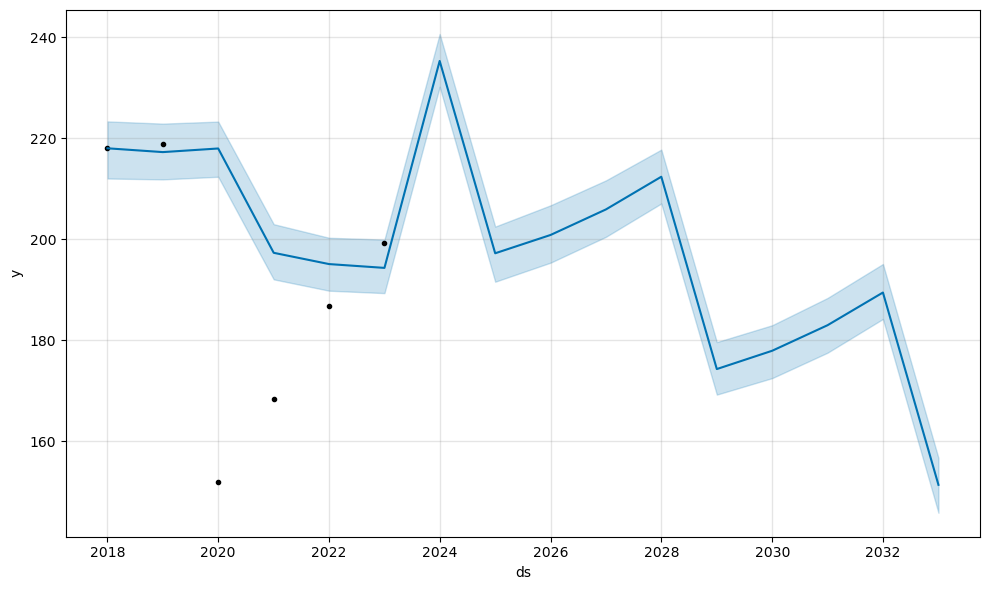

In [8]:
# --- Plot results of model 2 forecast ---

fig2 = m2.plot(forecast_m2)
plt.show()

In [9]:
# --- Evaluate model 2 ---

df_cv_m2 = cross_validation(
    model=m2,
    initial='365 D',
    period='730 D',
    horizon='365 D'
)

print(df_cv_m2.head())

df_p_m2 = performance_metrics(df_cv_m2)

print("\nPerformance Metrics head:")
print(df_p_m2.head())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/2 [00:00<?, ?it/s]10:40:08 - cmdstanpy - INFO - Chain [1] start processing
10:40:12 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:04<00:04,  4.36s/it]10:40:12 - cmdstanpy - INFO - Chain [1] start processing
10:40:13 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:05<00:00,  2.54s/it]


          ds        yhat  yhat_lower  yhat_upper      y     cutoff
0 2021-01-01  295.250074  295.250073  295.250074  168.4 2020-01-02
1 2023-01-01  177.224534  174.973538  179.632877  199.3 2022-01-01

Performance Metrics head:
   horizon         mse      rmse       mae      mape     mdape    smape  \
0 365 days  8289.13368  91.04468  74.46277  0.432016  0.432016  0.33222   

   coverage  
0       0.0  


In [10]:
# --- OLD ---

# ... your code to fit and predict ...
forecast = m.predict(prediction)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the historical data (optional, only if df_forecast contains 'y')
plt.plot(df_forecast['ds'], df_forecast['y'], 'k.', label='Historical Data')

# Plot the forecast line
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast ($\hat{y}$)')

# Plot the uncertainty interval (shaded area)
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='skyblue',
    alpha=0.4,
    label='Uncertainty Interval'
)

# Add labels and title
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'm' is not defined